In [ ]:
# Import all the needed packages

import numpy as np
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


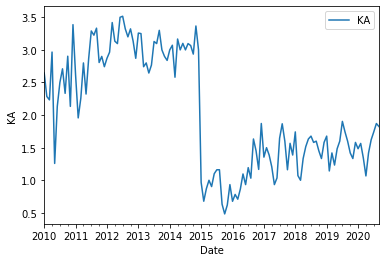

In [ ]:

# Load the data
data = pd.read_csv('ka2010-20 .csv', engine='python', skipfooter=3)
# A bit of pre-processing to make it nicer
data['tgl']=pd.to_datetime(data['tgl'], format='%Y-%m-%d')
data.set_index(['tgl'], inplace=True)

# Plot the data
data.plot()
plt.ylabel('KA')
plt.xlabel('Date')
plt.show()



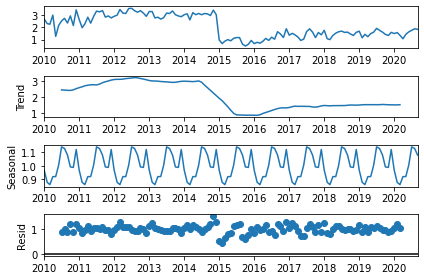

In [ ]:
result = seasonal_decompose(data, 'multipicative')
result.plot()
plt.show()

In [ ]:
# Determining if the time series is stationary or not
# Running dickey-fuller test on the time series 

result =adfuller(data['KA'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -2.7128062055222117
p-value: 0.07184833136112899


In [ ]:
# From the above test we conclude the time series is non stationary. 
# Taking the first difference of time series and droping NaN values

data_diff = data.diff().dropna()
result_diff = adfuller(data_diff['KA'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])

ADF Statistic: -10.460440209497165
p-value: 1.3634984956510856e-18


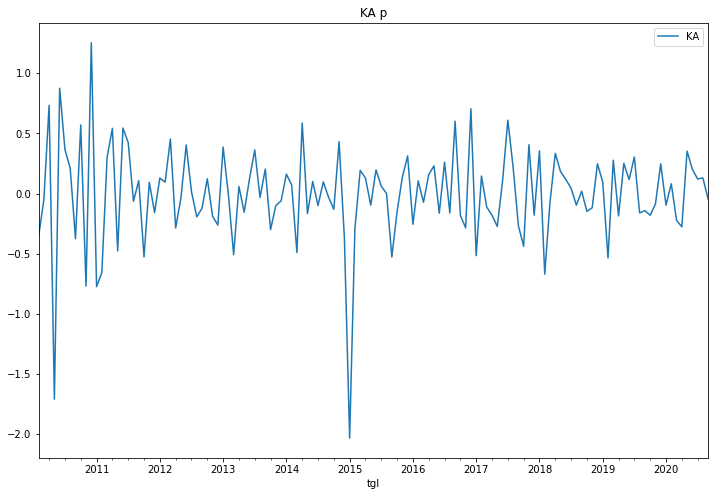

In [ ]:
# Plotting the time series after the first difference

data_diff.plot(figsize = (12,8), title = 'KA p')
plt.show()

In [ ]:
# Splitting the data into train and test set
x=data.values
data_train = x[:105]
data_test = x[105:]
len(data_test)

24

In [ ]:
# Finding AIC and BIC 
# Searching the model order with lowest AIC and BIC

import warnings
warnings.filterwarnings('ignore')
for p in range(5):
    
    for q in range(5):
        
        try:
            model = ARIMA(data_train, order = (p,1,q))
            fit_model = model.fit()
            
            print(p,q,fit_model.aic, fit_model.bic)
       
        except:
            print(p,q,None,None)

0 0 127.80935366476002 133.09813546304278
0 1 117.80897595413657 125.74214865156068
0 2 118.88960628171608 129.46716987828157
0 3 120.82682699103975 134.0487814867466
0 4 122.82672780526408 138.6930732001123
1 0 121.08414066369474 129.01731336111885
1 1 118.81015497551579 129.38771857208127
1 2 120.80602083150197 134.02797532720882
1 3 121.46521837215028 137.3315637669985
1 4 122.74461839230196 141.25535468629158
2 0 120.15285259742583 130.73041619399132
2 1 120.8071088049625 134.02906330066935
2 2 122.79881746305168 138.6651628578999
2 3 120.9758084674414 139.486544761431
2 4 123.71679309853357 144.87192029166454
3 0 121.1511180717865 134.37307256749335
3 1 124.15406406356178 140.02040945841
3 2 124.80863726587933 143.31937355986895
3 3 121.82442319621296 142.97955038934396
3 4 125.1630331144467 148.96255120671907
4 0 123.12017475209981 138.98652014694804
4 1 123.42502016427059 141.9357564582602
4 2 123.26058807905011 144.4157152721811
4 3 125.28918442519875 149.08870251747112
4 4 127

In [ ]:
# Fitting the ARIMA model into the train data set.
# Forecasting the next 60 months production 
model = ARIMA(data_train, order = (4,1,2))
fit_model = model.fit()
forecasted_data = fit_model.forecast(steps = 60)[0]
forecasted_data

array([1.54263447, 1.53604017, 1.4833484 , 1.47910098, 1.43268927,
       1.42440246, 1.38367194, 1.37361304, 1.3371703 , 1.32550987,
       1.29273841, 1.27990599, 1.25011795, 1.23640785, 1.20909195,
       1.19473257, 1.1694567 , 1.15462621, 1.13103836, 1.11587235,
       1.09368271, 1.07828479, 1.05725495, 1.04170332, 1.02163686,
       1.00599008, 0.98672496, 0.97102636, 0.95242873, 0.93670988,
       0.91866904, 0.90295248, 0.88537676, 0.86967816, 0.85249153,
       0.83682135, 0.81996067, 0.80432548, 0.78773824, 0.7721417 ,
       0.75578418, 0.74022784, 0.72406356, 0.70854747, 0.69254599,
       0.67706912, 0.66120495, 0.64576559, 0.63001741, 0.61461337,
       0.59896327, 0.58359211, 0.56802507, 0.55268425, 0.53718762,
       0.52187456, 0.50643771, 0.4911499 , 0.47576383, 0.46049886])

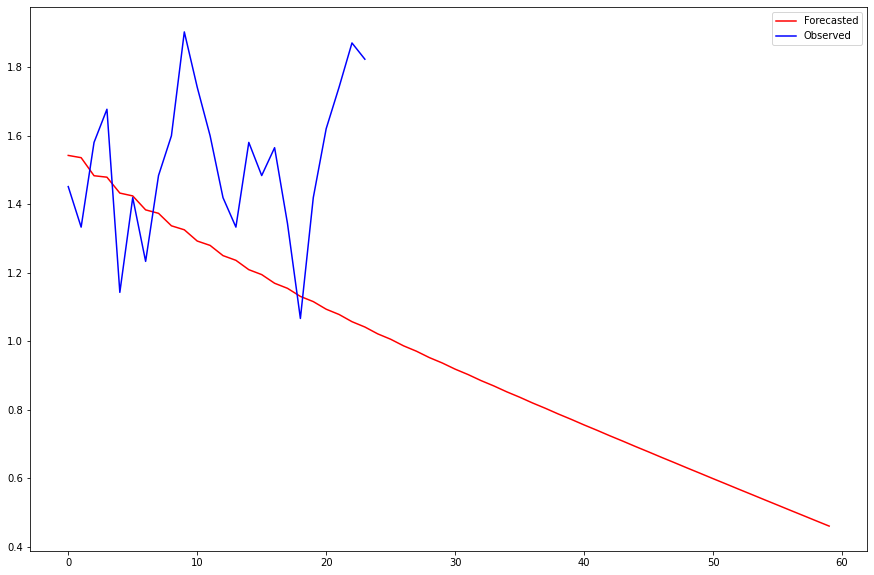

In [ ]:
# Plotting the forecasted data with the actaul test data

plt.figure(figsize=(15,10))
plt.plot(forecasted_data, color='red', label = 'Forecasted')
plt.plot(data_test, color= 'blue', label = 'Observed')
plt.legend()
plt.show()


#SARIMA


In [ ]:
!pip install pmdarima

In [ ]:
import pmdarima as pm

In [ ]:
# Run the function with the specified arguments to find the best model

sarima_model = pm.auto_arima(data, seasonal = True, m=12,d=1,D=1,start_p=1,start_q=1,start_P=0,max_p=3,max_q=3,
                             trace=True,error_action='ignore',
                            suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.97 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=177.545, Time=0.04 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=154.374, Time=0.20 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.64 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=174.214, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=147.497, Time=0.31 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=137.264, Time=1.19 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=135.773, Time=0.47 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=133.776, Time=0.43 sec
 ARIMA(1,1,0)(0,1,2)[12]             : AIC=135.773, Time=0.98 sec
 ARIMA(1,1,0)(1,1,2)[12]             : AIC=inf, Time=2.76 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=143.425, Time=0.57 sec
 ARIMA(2,1,0)(0,1,1)[12]             : AIC=inf, Time=0.51 sec
 ARIMA(2,1,1)(0,1,1)[12]             : AIC=inf, Time=0.52 sec
 ARIMA(1,1,0)(0,1,1)[12] intercept   : AIC=135.765, T

In [ ]:
# Fitting the model

sarima_model.fit(data_train)


ARIMA(maxiter=50, method='lbfgs', order=(1, 1, 0), out_of_sample_size=0,
      scoring='mse', scoring_args={}, seasonal_order=(0, 1, 1, 12),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=False)

In [ ]:
# Making the prediction based on the fitted SARIMA model

future_forecast = sarima_model.predict(n_periods=87)

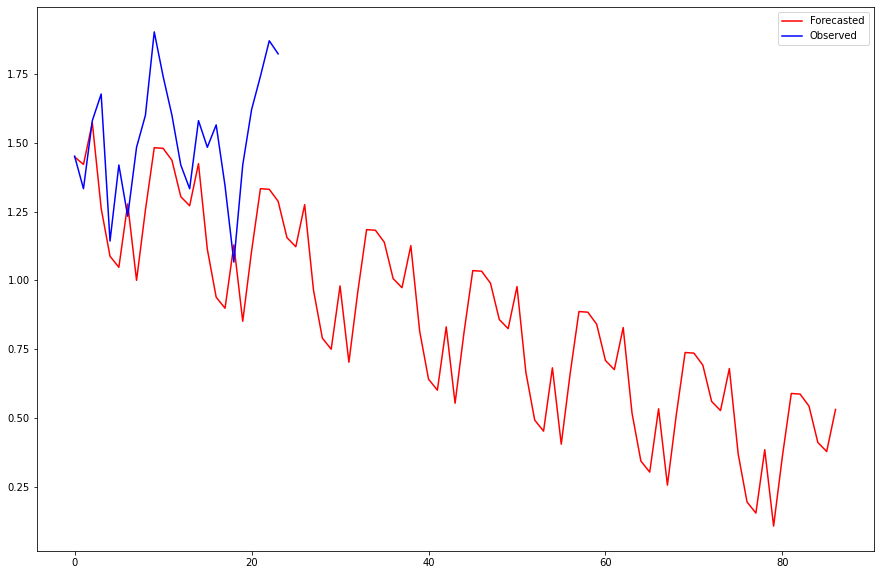

In [ ]:
# Plotting the predicted data

plt.figure(figsize=(15,10))
plt.plot(future_forecast, color='red', label = 'Forecasted')
plt.plot(data_test,color='blue', label = 'Observed')
#plt.plot(data_train,color='green', label = 'train')
plt.legend()
plt.show()

#print(data_train)
#print(data_test)
#print(future_forecast)

In [ ]:
date = pd.date_range(start="2018-10-1",end="2025-12-31", freq='M')

In [ ]:
sarima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  105
Model:             SARIMAX(1, 1, 0)x(0, 1, [1], 12)   Log Likelihood                 -59.579
Date:                              Sat, 12 Jun 2021   AIC                            125.159
Time:                                      18:03:20   BIC                            132.724
Sample:                                           0   HQIC                           128.212
                                              - 105                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3029      0.091     -3.329      0.001      -0.481      -0.125
ma.S.L12      -0.9894      3.375     -0.293      0.769      -7.605       5.626
sigma2         0.1628      0.540      0.301      0.763      -0.896       1.222
===================================================================================
Ljung-Box (L1) (Q):                   0.29   Jarque-Bera (JB):                97.04
Prob(Q):                              0.59   Prob(JB):                         0.00
Heteroskedasticity (H):               0.53   Skew:                            -1.12
Prob(H) (two-sided):                  0.08   Kurtosis:                         7.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
pd.DataFrame(future_forecast, columns=["ch"], index=date)

,ch
2018-10-31,1.448789
2018-11-30,1.421469
2018-12-31,1.572674
2019-01-31,1.262050
2019-02-28,1.087721
2019-03-31,1.047622
2019-04-30,1.277763
2019-05-31,1.000227
2019-06-30,1.255190
2019-07-31,1.482283


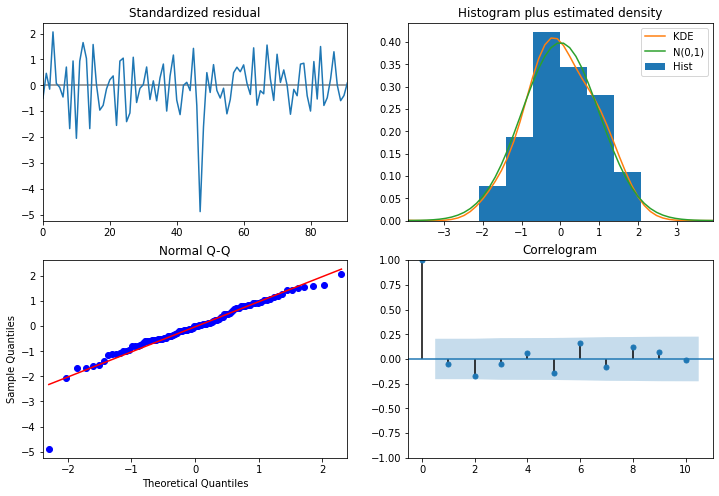

In [ ]:
# plotting the model diagnostics

sarima_model.plot_diagnostics(figsize=(12,8))
plt.show()

In [ ]:
def MAPE(y_true, y_pred): 
    """
    %Error compares true value with predicted value. Lower the better. Use this along with rmse(). If the series has 
    outliers, compare/select model using MAPE instead of rmse()
    
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

from sklearn.metrics import mean_squared_error

rms = mean_squared_error(data_test,future_forecast[:24], squared=False)
mape = MAPE(data_test,future_forecast[:24])
print("rms :",rms)
print("MAPE :",mape)

rms : 0.3567874625668019
MAPE : 20.818392521183128


In [ ]:
def accuracy(y1,y2):
    
    accuracy_df=pd.DataFrame()
    
    #rms_error = np.round(rmse(y1, y2),1)
    
    #map_error = np.round(np.mean(np.abs((np.array(y1) - np.array(y2)) / np.array(y1))) * 100,1)
           
    accuracy_df=accuracy_df.append({"RMSE":rms, "%MAPE": mape}, ignore_index=True)
    
    return accuracy_df

accuracy(data_test,future_forecast[:24])

,%MAPE,RMSE
0,20.818393,0.356787
